In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# constants in cgs
Gconst = 6.674e-8
Msun = 1.989e33
Rsun = 6.957e10
secday = 3600.0*24.0
secyear = secday * 365.25

In [28]:
data_dir = '../paperI/init_models/CE_paperI_StartingModel_12M_'

# 12 Msun giant

# 200 Rsun
file_dir = data_dir + '200R.data'
M12_200R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 250 Rsun
file_dir = data_dir + '250R.data'
M12_250R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 300 Rsun
file_dir = data_dir + '300R.data'
M12_300R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 350 Rsun
file_dir = data_dir + '350R.data'
M12_350R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 400 Rsun
file_dir = data_dir + '400R.data'
M12_400R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 450 Rsun
file_dir = data_dir + '450R.data'
M12_450R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 500 Rsun
file_dir = data_dir + '500R.data'
M12_500R = np.genfromtxt(file_dir, skip_header=5, names=True)


models = [M12_200R, M12_250R, M12_300R, M12_350R, M12_400R, M12_450R]
# models = [M12_200R, M12_250R, M12_300R, M12_350R, M12_400R, M12_450R, M12_500R]

### Calculate the binding energy

In [65]:
binding_energy = []
core_mass_h10 = []
core_mass_h50 = []
for k, model in enumerate(models):

    tmp = 0.0
    for i in range(len(model)):

        dm = model['dm'][i]
#         dm = 10**model['logdq'][i] * model['mass'][0]*Msun
                
        # Core mass definition: h abundance is above 10%
        if model['h1'][i] > 0.1:
            tmp += dm * (model['energy'][i] - Gconst * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun))
            core_mass_h10_tmp = model['mass'][i]*Msun

        # Core mass definition: h abundance is above 50%
        if model['h1'][i] > 0.5:
            tmp += dm * (model['energy'][i] - Gconst * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun))
            core_mass_h50_tmp = model['mass'][i]*Msun

    binding_energy.append(tmp)
    core_mass_h10.append(core_mass_h10_tmp)
    core_mass_h50.append(core_mass_h50_tmp)

binding_energy = np.array(binding_energy)
core_mass_h10 = np.array(core_mass_h10)
core_mass_h50 = np.array(core_mass_h50)

In [66]:
radii = []

for k, model in enumerate(models):
    radii.append(10**model['logR'][0])
    
    print(10**model['logR'][0])
    
radii = np.array(radii)

201.34090925956792
252.38735055638784
303.68030887861534
352.8746338020859
400.756833705482
450.136041186157


### Calculate the orbital energy

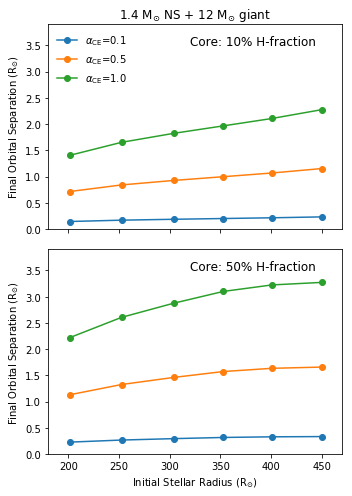

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(5,7))

alpha = [0.1, 0.5, 1.0]
color = ["C0", "C1", "C2"]

CO_mass = 1.4*Msun




for j in range(len(alpha)):
    orb_sep_f_h10 = []
    orb_sep_f_h50 = []
    
    for i, model in enumerate(models):

        a_i = 0.99 * 10**model[0]['logR'] * Rsun

        e_orb_i = -Gconst * (model[0]['mass']*Msun) * (CO_mass) / a_i
        e_orb_f = binding_energy[i] / alpha[j] + e_orb_i

        a_f_h10 = -Gconst * core_mass_h10[i] * (CO_mass) / e_orb_f
        a_f_h50 = -Gconst * core_mass_h50[i] * (CO_mass) / e_orb_f

        orb_sep_f_h10.append(a_f_h10 / Rsun)
        orb_sep_f_h50.append(a_f_h50 / Rsun)


    orb_sep_f_h10 = np.array(orb_sep_f_h10)
    orb_sep_f_h50 = np.array(orb_sep_f_h50)

    ax[0].plot(radii, orb_sep_f_h10, 'o-', color=color[j], label=r'$\alpha_{\rm CE}$='+str(alpha[j]))    
    ax[1].plot(radii, orb_sep_f_h50, 'o-', color=color[j], label=r'$\alpha_{\rm CE}$='+str(alpha[j]))    
#     plt.scatter(radii, orb_sep_f, color=color[j], label=r'$\alpha_{\rm CE}$='+str(alpha[j]))



ax[1].set_xlabel(r"Initial Stellar Radius (R$_{\odot}$)")
ax[0].set_ylabel(r"Final Orbital Separation (R$_{\odot}$)")
ax[1].set_ylabel(r"Final Orbital Separation (R$_{\odot}$)")

ax[0].set_xticklabels([])

ax[0].legend(frameon=False, loc=2)
ax[0].set_xlim(180, 470)
ax[0].set_ylim(0, 3.9)
ax[1].set_xlim(180, 470)
ax[1].set_ylim(0, 3.9)
ax[0].set_title(r"1.4 M$_{\odot}$ NS + 12 M$_{\odot}$ giant")

ax[0].text(320, 3.5, 'Core: 10% H-fraction', fontsize=12)
ax[1].text(320, 3.5, 'Core: 50% H-fraction', fontsize=12)

plt.tight_layout()
plt.savefig("../figures/predicted_separations_final.pdf")
# plt.show()